### Assignment for GDP Analysis

In [ ]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

### For Part I - A

In [4]:
data1 = pd.read_csv("D:/NoBroker/Backup/Data-I-A-Download.csv")

In [673]:
data1.head()

,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Himachal Pradesh,Jammu & Kashmir,Jharkhand,Karnataka,Kerala,Madhya Pradesh,Maharashtra,Manipur,Meghalaya,Mizoram,Nagaland,Odisha,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal1,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry
0,2011-12,379402.0,11063.0,143175.0,247144.0,158074.0,42367.0,615606.0,297539.0,72720.0,78254.0,150918.0,603778.0,364048.0,315561.0,1272967.0,12915.0,19918.0,7259.0,11839.0,227872.0,266628.0,436465.0,11165.0,751485.0,359433.0,19208.0,724049.0,115523.0,NaN,3979.0,18768.0,343767.0,16818.0
1,2012-13,411404.0,12547.0,156864.0,282368.0,177511.0,38120.0,724495.0,347032.0,82820.0,87105.0,174724.0,691700.0,412313.0,380924.0,1448466.0,13748.0,21872.0,8362.0,13619.0,258275.0,297734.0,494004.0,12338.0,855481.0,401493.0,21663.0,822903.0,131835.0,NaN,4421.0,21609.0,391238.0,18875.0
2,2013-14,464272.0,14602.0,177745.0,317101.0,206690.0,35921.0,807623.0,400662.0,94764.0,95893.0,188567.0,817886.0,465041.0,437737.0,1647506.0,16198.0,22938.0,10293.0,16612.0,291709.0,334714.0,549701.0,13862.0,971090.0,452186.0,25593.0,944146.0,149817.0,NaN,5159.0,24787.0,443783.0,21870.0
3,2014-15,526468.0,16761.0,198098.0,373920.0,234982.0,40633.0,895027.0,437462.0,104369.0,100404.0,217107.0,921788.0,526002.0,481982.0,1792122.0,18043.0,24408.0,11559.0,18414.0,321971.0,368011.0,612194.0,15209.0,1092564.0,511178.0,29667.0,1043371.0,161985.0,NaN,5721.0,27844.0,492424.0,24089.0
4,2015-16,609934.0,18784.0,224234.0,413503.0,260776.0,45002.0,994316.0,485184.0,NaN,118387.0,241955.0,1027068.0,588337.0,543975.0,NaN,NaN,26745.0,NaN,NaN,341887.0,NaN,NaN,16637.0,1212668.0,575631.0,NaN,1153795.0,184091.0,NaN,NaN,30304.0,551963.0,26533.0


In [211]:
# Removing 16-17 year rows as its not required

data1 = data1[data1['Duration']!= '2016-17']

In [212]:
# Segregating GDP and Percentage growth into two different Data Frames

data_gdp = data1[data1['Assam']>100]
data_per_growth = data1[data1['Assam']<100].reset_index().drop('index',axis =1)

In [142]:
# Since we want for from 2013-2016, filtering out the particular rows that is required

data_per_growth = data_per_growth[1:]

In [143]:
# Taking the mean for 3 years of data to check the mean growth of the states.

data_per_growth = pd.DataFrame(data_per_growth.mean(axis = 0)).reset_index()
data_per_growth.columns = ['States','Mean_per_growth']

In [144]:
# Sorting the values in decreasing order of the highest growth in the states.

data_per_growth = data_per_growth.sort_values('Mean_per_growth',ascending=False).reset_index(drop =True)

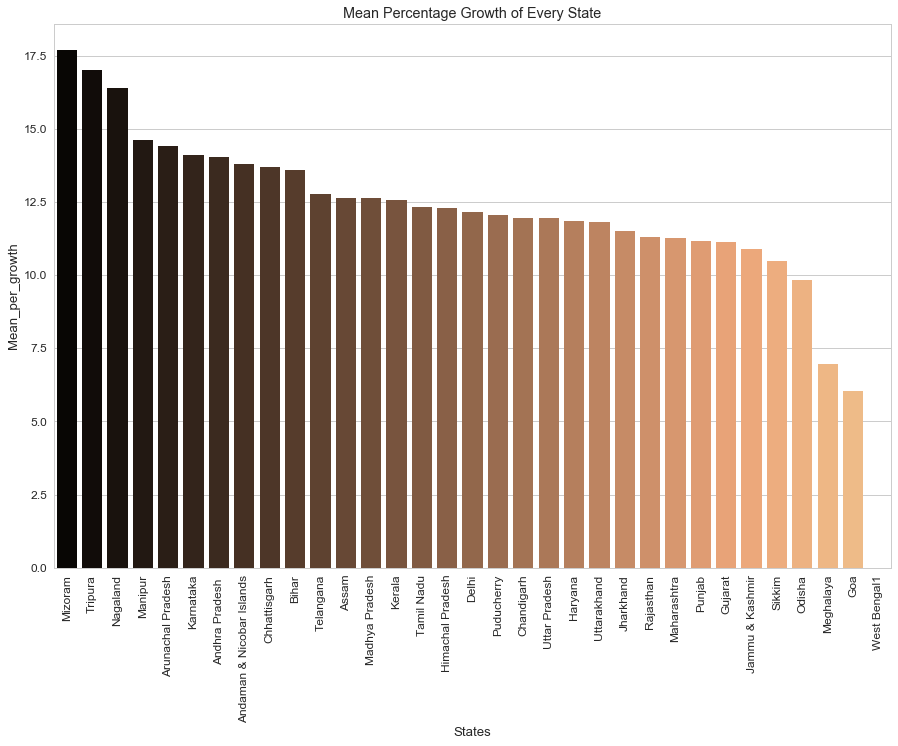

In [150]:
# Plotting the data to check which state has been growing as a faster rate.

fig = plt.figure(figsize=(15,10))
sns.set(font_scale=1.2)
sns.set_style('whitegrid')

sns.barplot('States','Mean_per_growth' ,data=data_per_growth,palette='copper',order = data_per_growth['States'])
plt.xticks(rotation = 90)
plt.title("Mean Percentage Growth of Every State")

plt.show()

- From the plot above we can see that States like Mizoram,Tripura and Nagaland are growing at a faster rate 
- And states like Meghalaya and Odisha are struggling to grow year by year
- Since my Home State is Delhi, it is contributing fairly enough (but at a lower rate) to the national average for this duration

In [213]:
# Dropping Duration and West Bengal since , it has all null values

data_gdp_new = data_gdp.drop(['Duration','West Bengal1'],axis = 1)

In [215]:
# Filling up the NaN Values with the mean of those columns to properly identify the states with highest GDP

cols = data_gdp_new.columns

for i in cols:
    mean = data_gdp_new[i].mean()
    data_gdp_new[i] = np.where(data_gdp_new[i].isnull(),mean,data_gdp_new[i])

In [218]:
data_gdp_new = pd.concat([data_gdp['Duration'],data_gdp_new],axis = 1)

#### To plot the GDP for the year 2015-16

In [220]:
# Filtering the data only for 2015-16

data_gdp_15_16 = data_gdp_new[data_gdp_new['Duration']=='2015-16']

In [221]:
# Manipulating the data for plotting

data_gdp_15_16 = pd.DataFrame(data_gdp_15_16.mean(axis=0,skipna=True)).reset_index()
data_gdp_15_16.columns = ['States','GDP']
data_gdp_15_16 = data_gdp_15_16.sort_values('GDP',ascending = False)

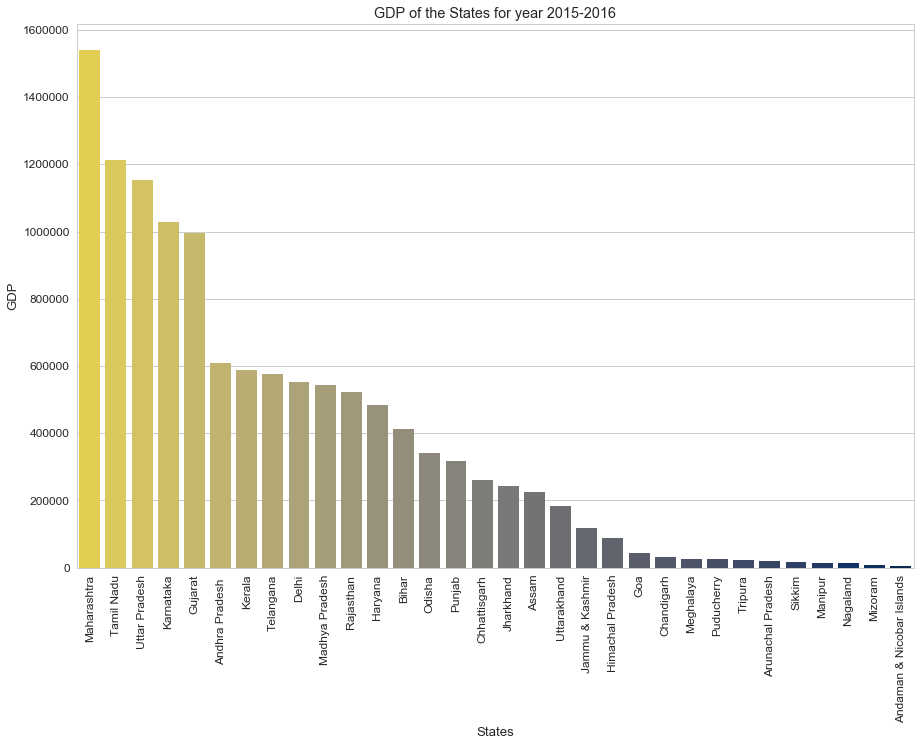

In [223]:
# Plotting the data to check the states which has highest GDP for the year 2015-16

fig = plt.figure(figsize=(15,10))
sns.set(font_scale=1.2)
sns.set_style('whitegrid')

sns.barplot('States','GDP' ,data=data_gdp_15_16,palette='cividis_r',order = data_gdp_15_16['States'])
plt.xticks(rotation = 90)
plt.title("GDP of the States for year 2015-2016")

plt.show()

- Top 5 States based on GDP are :
    - Maharashtra
    - Tamil Nadu
    - Uttar Pradesh
    - Karnataka
    - Gujarat
- Bottom 5 States based on GDP are:
    - Sikkim
    - Manipur
    - Nagaland
    - Mizoram
    - Andaman & Nicobar Islands

### For Part I - B

In [246]:
# Reading all the Data for States

andhra = pd.read_csv("D:/NoBroker/Backup/NAD-Andhra_Pradesh-GSVA_cur_2016-17.csv")
andhra = andhra[['S.No.','Item','2014-15']]
andhra.columns = ['S.No.','Item','andhra']

arunachal = pd.read_csv("D:/NoBroker/Backup/NAD-Arunachal_Pradesh-GSVA_cur_2015-16.csv")
arunachal = arunachal[['S.No.','Item','2014-15']]
arunachal.columns = ['S.No.','Item','arunachal']

assam = pd.read_csv("D:/NoBroker/Backup/NAD-Assam-GSVA_cur_2015-16.csv")
assam = assam[['S.No.','Item','2014-15']]
assam.columns = ['S.No.','Item','assam']

bihar = pd.read_csv("D:/NoBroker/Backup/NAD-Bihar-GSVA_cur_2015-16.csv")
bihar = bihar[['S.No.','Item','2014-15']]
bihar.columns = ['S.No.','Item','bihar']

chhattisgarh = pd.read_csv("D:/NoBroker/Backup/NAD-Chhattisgarh-GSVA_cur_2016-17.csv")
chhattisgarh = chhattisgarh[['S.No.','Item','2014-15']]
chhattisgarh.columns = ['S.No.','Item','chhattisgarh']

goa = pd.read_csv("D:/NoBroker/Backup/NAD-Goa-GSVA_cur_2015-16.csv")
goa = goa[['S.No.','Item','2014-15']]
goa.columns = ['S.No.','Item','goa']

gujarat = pd.read_csv("D:/NoBroker/Backup/NAD-Gujarat-GSVA_cur_2015-16.csv")
gujarat = gujarat[['S.No.','Item','2014-15']]
gujarat.columns = ['S.No.','Item','gujarat']

haryana = pd.read_csv("D:/NoBroker/Backup/NAD-Haryana-GSVA_cur_2016-17.csv")
haryana = haryana[['S.No.','Item','2014-15']]
haryana.columns = ['S.No.','Item','haryana']

himachal = pd.read_csv("D:/NoBroker/Backup/NAD-Himachal_Pradesh-GSVA_cur_2014-15.csv")
himachal = himachal[['S.No.','Item','2014-15']]
himachal.columns = ['S.No.','Item','himachal']

jharkhand = pd.read_csv("D:/NoBroker/Backup/NAD-Jharkhand-GSVA_cur_2015-16.csv")
jharkhand = jharkhand[['S.No.','Item','2014-15']]
jharkhand.columns = ['S.No.','Item','jharkhand']

karnataka = pd.read_csv("D:/NoBroker/Backup/NAD-Karnataka-GSVA_cur_2015-16.csv")
karnataka = karnataka[['S.No.','Item','2014-15']]
karnataka.columns = ['S.No.','Item','karnataka']

kerala = pd.read_csv("D:/NoBroker/Backup/NAD-Kerala-GSVA_cur_2015-16.csv")
kerala = kerala[['S.No.','Item','2014-15']]
kerala.columns = ['S.No.','Item','kerala']

madhya = pd.read_csv("D:/NoBroker/Backup/NAD-Madhya_Pradesh-GSVA_cur_2016-17.csv")
madhya = madhya[['S.No.','Item','2014-15']]
madhya.columns = ['S.No.','Item','madhya']

maharashtra = pd.read_csv("D:/NoBroker/Backup/NAD-Maharashtra-GSVA_cur_2014-15.csv")
maharashtra = maharashtra[['S.No.','Item','2014-15']]
maharashtra.columns = ['S.No.','Item','maharashtra']

manipur = pd.read_csv("D:/NoBroker/Backup/NAD-Manipur-GSVA_cur_2014-15.csv",encoding = 'unicode_escape')
manipur = manipur[['S.No.','Item','2014-15']]
manipur.columns = ['S.No.','Item','manipur']

meghalaya = pd.read_csv("D:/NoBroker/Backup/NAD-Meghalaya-GSVA_cur_2016-17.csv")
meghalaya = meghalaya[['S.No.','Item','2014-15']]
meghalaya.columns = ['S.No.','Item','meghalaya']

mizoram = pd.read_csv("D:/NoBroker/Backup/NAD-Mizoram-GSVA_cur_2014-15.csv")
mizoram = mizoram[['S.No.','Item','2014-15']]
mizoram.columns = ['S.No.','Item','mizoram']

nagaland = pd.read_csv("D:/NoBroker/Backup/NAD-Nagaland-GSVA_cur_2014-15.csv")
nagaland = nagaland[['S.No.','Item','2014-15']]
nagaland.columns = ['S.No.','Item','nagaland']

odisha = pd.read_csv("D:/NoBroker/Backup/NAD-Odisha-GSVA_cur_2016-17.csv")
odisha = odisha[['S.No.','Item','2014-15']]
odisha.columns = ['S.No.','Item','odisha']

punjab = pd.read_csv("D:/NoBroker/Backup/NAD-Punjab-GSVA_cur_2014-15.csv")
punjab = punjab[['S.No.','Item','2014-15']]
punjab.columns = ['S.No.','Item','punjab']

rajasthan = pd.read_csv("D:/NoBroker/Backup/NAD-Rajasthan-GSVA_cur_2014-15.csv")
rajasthan = rajasthan[['S.No.','Item','2014-15']]
rajasthan.columns = ['S.No.','Item','rajasthan']

sikkim = pd.read_csv("D:/NoBroker/Backup/NAD-Sikkim-GSVA_cur_2015-16.csv")
sikkim = sikkim[['S.No.','Item','2014-15']]
sikkim.columns = ['S.No.','Item','sikkim']

tamilnadu = pd.read_csv("D:/NoBroker/Backup/NAD-Tamil_Nadu-GSVA_cur_2016-17.csv")
tamilnadu = tamilnadu[['S.No.','Item','2014-15']]
tamilnadu.columns = ['S.No.','Item','tamilnadu']

telangana = pd.read_csv("D:/NoBroker/Backup/NAD-Telangana-GSVA_cur_2016-17.csv")
telangana = telangana[['S.No.','Item','2014-15']]
telangana.columns = ['S.No.','Item','telangana']

tripura = pd.read_csv("D:/NoBroker/Backup/NAD-Tripura-GSVA_cur_2014-15.csv")
tripura = tripura[['S.No.','Item','2014-15']]
tripura.columns = ['S.No.','Item','tripura']

up = pd.read_csv("D:/NoBroker/Backup/NAD-Uttar_Pradesh-GSVA_cur_2015-16.csv")
up = up[['S.No.','Item','2014-15']]
up.columns = ['S.No.','Item','up']

uttarakhand = pd.read_csv("D:/NoBroker/Backup/NAD-Uttarakhand-GSVA_cur_2015-16.csv")
uttarakhand = uttarakhand[['S.No.','Item','2014-15']]
uttarakhand.columns = ['S.No.','Item','uttarakhand']

In [292]:
# Merging all the states in one DataFrame for clear insight

all_states = pd.concat([andhra,arunachal['arunachal'],assam['assam'],bihar['bihar'],chhattisgarh['chhattisgarh'],
                        goa['goa'],gujarat['gujarat'],haryana['haryana'],himachal['himachal'],jharkhand['jharkhand'],
                        karnataka['karnataka'],kerala['kerala'],madhya['madhya'],maharashtra['maharashtra'],
                        manipur['manipur'],meghalaya['meghalaya'],mizoram['mizoram'],nagaland['nagaland'],
                        odisha['odisha'],punjab['punjab'],rajasthan['rajasthan'],sikkim['sikkim'],tamilnadu['tamilnadu'],
                        telangana['telangana'],tripura['tripura'],up['up'],uttarakhand['uttarakhand']],axis=1)

In [453]:
# Segregating the Data into Two parts - (one for Primary , Secondary And Tertiary) , (second for Sub-sectors)

all_states_total_gdp = all_states[(all_states['Item']=='Primary') | (all_states['Item']=='Secondary') |
                                 (all_states['Item']=='Tertiary') | (all_states['Item']=='TOTAL GSVA at basic prices') |
                                 (all_states['Item']=='Per Capita GSDP (Rs.)')]
all_states_total_gdp = all_states_total_gdp.drop('S.No.',axis=1).reset_index(drop = True) 

In [320]:
all_states_new = all_states[(all_states['Item']!='Primary') & (all_states['Item']!='Secondary') & (all_states['Item']!='Tertiary')]

In [321]:
# Taking Only the sub-sectors and not the category within sub-sectors

all_states_new['S.No.'] = all_states_new['S.No.'].astype(float) 
all_states_new_1 = all_states_new[(all_states_new['S.No.']==1) | (all_states_new['S.No.']==2) | (all_states_new['S.No.']==3) |
                                  (all_states_new['S.No.']==4) | (all_states_new['S.No.']==5) | (all_states_new['S.No.']==6) |
                                  (all_states_new['S.No.']==7) | (all_states_new['S.No.']==8) | (all_states_new['S.No.']==9) |
                                  (all_states_new['S.No.']==10) | (all_states_new['S.No.']==11) | (all_states_new['S.No.']==12) |
                                  (all_states_new['S.No.']==13) | (all_states_new['S.No.']==14) | (all_states_new['S.No.']==15) |
                                  (all_states_new['S.No.']==16) | (all_states_new['S.No.']==17)]

In [351]:
# To plot Per Capita for each state, we will make another DataFrame

all_states_per_capita = all_states_new_1[all_states_new_1['Item']=='Per Capita GSDP (Rs.)'].reset_index(drop = True)

In [352]:
# Manipulating the data for plotting

all_states_per_capita = all_states_per_capita.iloc[:,2:]
all_states_per_capita_mean = pd.DataFrame(all_states_per_capita.mean(axis = 0)).reset_index()
all_states_per_capita_mean.columns = ['States','GDP_per_capita']
all_states_per_capita_mean = all_states_per_capita_mean.sort_values('GDP_per_capita',ascending = False)

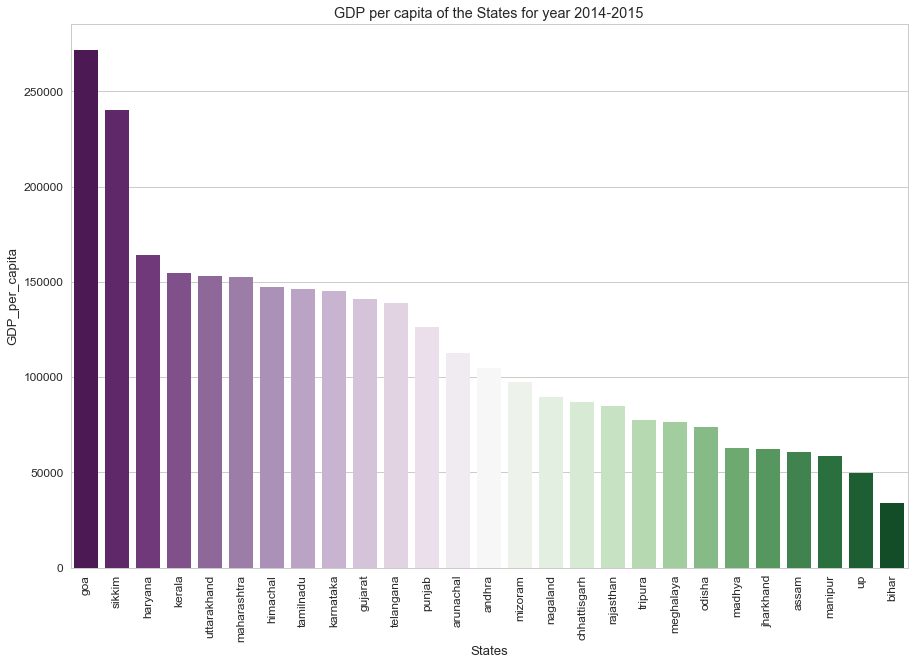

In [357]:
# Plotting GDP per capita for all the states

fig = plt.figure(figsize=(15,10))
sns.set(font_scale=1.2)
sns.set_style('whitegrid')

sns.barplot('States','GDP_per_capita' ,data=all_states_per_capita_mean,palette='PRGn',order = all_states_per_capita_mean['States'])
plt.xticks(rotation = 90)
plt.title("GDP per capita of the States for year 2014-2015")

plt.show()

- Top 5 States based on GDP per Capita :
    - Goa 
    - Sikkim
    - Haryana 
    - Kerala
    - Uttarakhand
- Bottom 5 States based on GDP per capita :
    - Jharkhand
    - Assam
    - Manipur
    - Uttar Pradesh
    - Bihar
- Ratio of Top State to Bottom State GDP is :
    - Top - Goa (271793)
    - Bottom - Bihar (33954)
    - 8.004 times the GDP of Top State is Higher than the Bottom State

In [454]:
# To check the primary , Secondary and tertiary distribution percentage

all_states_total_gdp_t = pd.DataFrame(all_states_total_gdp.T).reset_index()
all_states_total_gdp_t = all_states_total_gdp_t.drop(0)
all_states_total_gdp_t.columns = ['States','Primary','Secondary','Tertiary','TOTAL GSVA at basic prices','Per Capita GSDP']

In [455]:
# Creating new columns based on primary,secondary and tertiary percentage contribution

all_states_total_gdp_t['pri_per'] = (all_states_total_gdp_t['Primary']/all_states_total_gdp_t['TOTAL GSVA at basic prices'])*100
all_states_total_gdp_t['sec_per'] = (all_states_total_gdp_t['Secondary']/all_states_total_gdp_t['TOTAL GSVA at basic prices'])*100
all_states_total_gdp_t['ter_per'] = (all_states_total_gdp_t['Tertiary']/all_states_total_gdp_t['TOTAL GSVA at basic prices'])*100

In [456]:
# Re-arranging the Columns

all_states_total_gdp_t = all_states_total_gdp_t[['States','Primary','pri_per','Secondary','sec_per','Tertiary','ter_per',
                                                 'Per Capita GSDP','TOTAL GSVA at basic prices']]

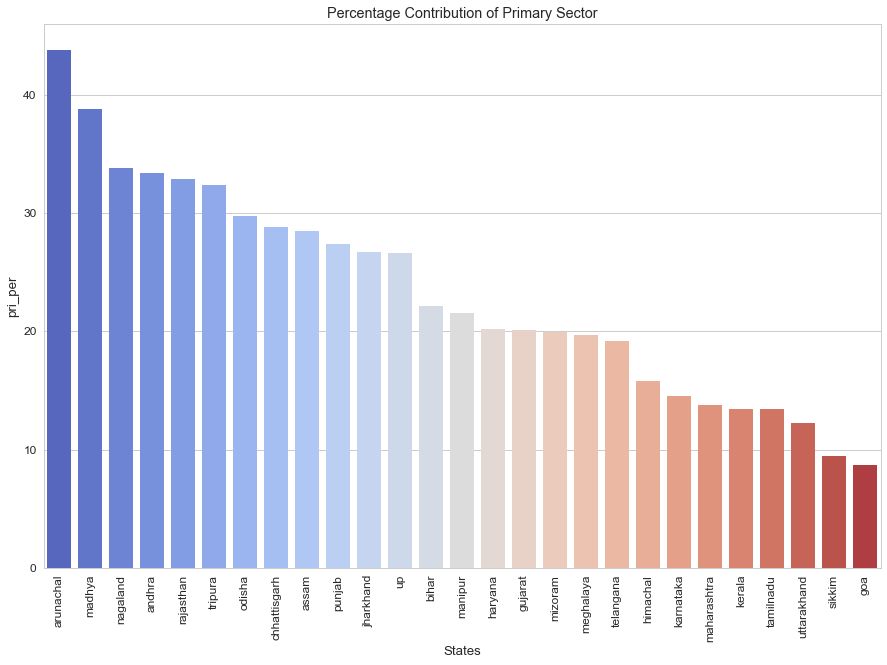

In [457]:
# Plotting Contrinution of primary

fig = plt.figure(figsize=(15,10))
sns.set(font_scale=1.2)
sns.set_style('whitegrid')


sns.barplot(all_states_total_gdp_t.sort_values('pri_per',ascending = False)['States'] ,
        all_states_total_gdp_t.sort_values('pri_per',ascending = False)['pri_per'] ,
        data=all_states_total_gdp_t,palette='coolwarm',order =all_states_total_gdp_t.sort_values('pri_per',ascending = False)['States'])


plt.xticks(rotation = 90)
plt.title("Percentage Contribution of Primary Sector")

plt.show()

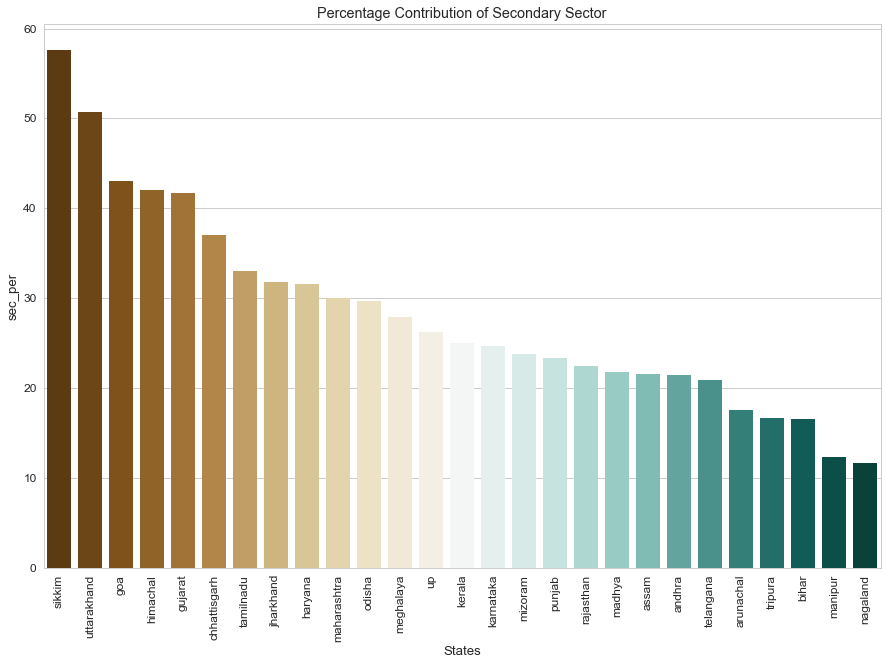

In [458]:
# Plotting Contribution of Secondary

fig = plt.figure(figsize=(15,10))
sns.set(font_scale=1.2)
sns.set_style('whitegrid')


sns.barplot(all_states_total_gdp_t.sort_values('sec_per',ascending = False)['States'],
             all_states_total_gdp_t.sort_values('sec_per',ascending = False)['sec_per'] ,
             data=all_states_total_gdp_t,palette='BrBG',order =all_states_total_gdp_t.sort_values('sec_per',ascending = False)['States'])

plt.xticks(rotation = 90)
plt.title("Percentage Contribution of Secondary Sector")


plt.show()

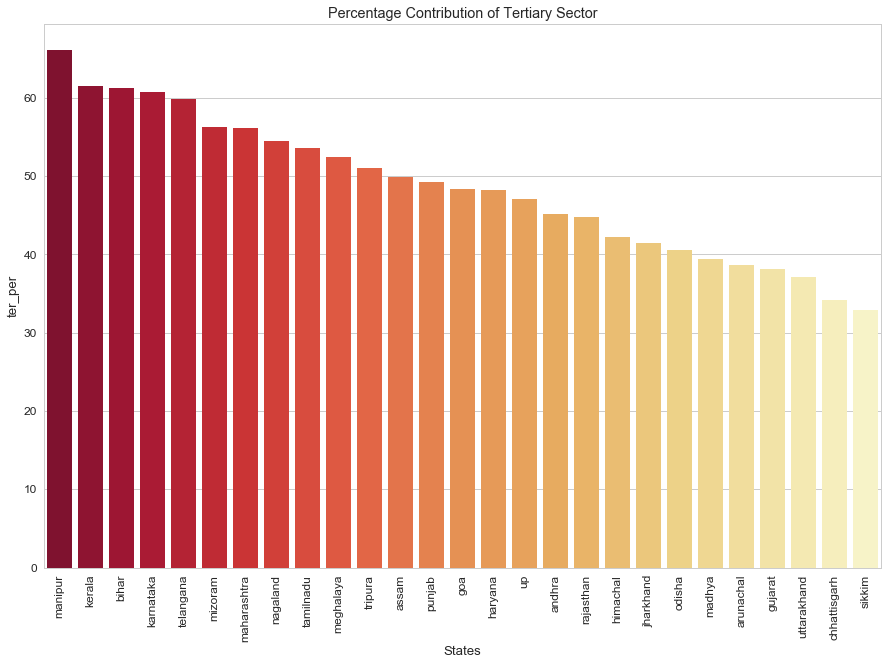

In [459]:
# Plotting Contribution of Tertiary

fig = plt.figure(figsize=(15,10))
sns.set(font_scale=1.2)
sns.set_style('whitegrid')


sns.barplot(all_states_total_gdp_t.sort_values('ter_per',ascending = False)['States'],
             all_states_total_gdp_t.sort_values('ter_per',ascending = False)['ter_per'] ,
             data=all_states_total_gdp_t,palette='YlOrRd_r',order =all_states_total_gdp_t.sort_values('ter_per',ascending = False)['States'])

plt.xticks(rotation = 90)
plt.title("Percentage Contribution of Tertiary Sector")

plt.show()

In [477]:
# To check the Percentage per Capita for each state

all_states_total_gdp_t['per capita per'] = all_states_total_gdp_t['Per Capita GSDP']/all_states_total_gdp_t['Per Capita GSDP'].sum() * 100

In [484]:
# Calculating the quantiles for GSDP for dividing into 4 Categories

arr = all_states_total_gdp_t['Per Capita GSDP']

Q1 = np.quantile(arr, .2)
Q2 = np.quantile(arr, .5)
Q3 = np.quantile(arr, .85)

print("Q1 quantile of arr : ", Q1) 
print("Q2 quantile of arr : ", Q2) 
print("Q3 quantile of arr : ", Q3)  

Q1 quantile of arr :  65187.0
Q2 quantile of arr :  104977.0
Q3 quantile of arr :  153246.19999999998


In [588]:
# Segregating States into Categories for Furthur insights

all_states_total_gdp_t['category'] = np.where(all_states_total_gdp_t['Per Capita GSDP'] < Q1,'C4',0)
all_states_total_gdp_t['category'] = np.where((all_states_total_gdp_t['Per Capita GSDP'] >= Q1) & (all_states_total_gdp_t['Per Capita GSDP'] < Q2) ,'C3',all_states_total_gdp_t['category'])
all_states_total_gdp_t['category'] = np.where((all_states_total_gdp_t['Per Capita GSDP'] >= Q2) & (all_states_total_gdp_t['Per Capita GSDP'] < Q3) ,'C2',all_states_total_gdp_t['category'])
all_states_total_gdp_t['category'] = np.where((all_states_total_gdp_t['Per Capita GSDP'] >= Q3) ,'C1',all_states_total_gdp_t['category'])

In [589]:
# Creating new DataFrame for every Category to visualize in a proper way

c1_states = pd.DataFrame(all_states_total_gdp_t[all_states_total_gdp_t['category'] == 'C1']).reset_index(drop=True)
c2_states = pd.DataFrame(all_states_total_gdp_t[all_states_total_gdp_t['category'] == 'C2']).reset_index(drop=True)
c3_states = pd.DataFrame(all_states_total_gdp_t[all_states_total_gdp_t['category'] == 'C3']).reset_index(drop=True)
c4_states = pd.DataFrame(all_states_total_gdp_t[all_states_total_gdp_t['category'] == 'C4']).reset_index(drop=True)

In [590]:
# Dropping unnecessary columns

c4_states1 = pd.DataFrame(all_states_new_1[['Item','S.No.','assam','bihar','jharkhand','madhya','manipur',
                                            'up']]).reset_index(drop=True)
c3_states1 = pd.DataFrame(all_states_new_1[['Item','S.No.','chhattisgarh','meghalaya','mizoram','nagaland',
                                            'odisha','rajasthan','tripura']]).reset_index(drop=True)
c2_states1 = pd.DataFrame(all_states_new_1[['Item','S.No.','andhra','arunachal','gujarat','himachal','karnataka',
                                            'maharashtra','punjab','tamilnadu','telangana','uttarakhand']]).reset_index(drop=True)
c1_states1 = pd.DataFrame(all_states_new_1[['Item','S.No.','goa','haryana','kerala','sikkim']]).reset_index(drop=True)

In [591]:
# Getting the Data that to indentify top sub-sectors contribution for 80% of Total GDP

c1 = c1_states1.iloc[0:11]
c2 = c2_states1.iloc[0:11]
c3 = c3_states1.iloc[0:11]
c4 = c4_states1.iloc[0:11]

#### For Category c4

In [640]:
c4['assam_per'] = c4['assam']/c4['assam'].sum()
c4['bihar_per'] = c4['bihar']/c4['bihar'].sum()
c4['jharkhand_per'] = c4['jharkhand']/c4['jharkhand'].sum()
c4['madhya_per'] = c4['madhya']/c4['madhya'].sum()
c4['manipur_per'] = c4['manipur']/c4['manipur'].sum()
c4['up_per'] = c4['up']/c4['up'].sum()

In [641]:
c4_new = c4.drop(['S.No.','assam','bihar','jharkhand','madhya','manipur','up'],axis=1)
c4_new_mean = pd.DataFrame(c4_new.mean(axis=1,skipna=True))
c4_new_mean = pd.concat([c4['Item'],c4_new_mean],axis=1)
c4_new_mean.columns = ['Item','Percentage to GSDP']
c4_new_mean = c4_new_mean.sort_values('Percentage to GSDP' , ascending = False)
c4_new_mean['Cum_sum'] = c4_new_mean['Percentage to GSDP'].cumsum()
c4_new_mean = c4_new_mean[c4_new_mean['Cum_sum']<=0.80]

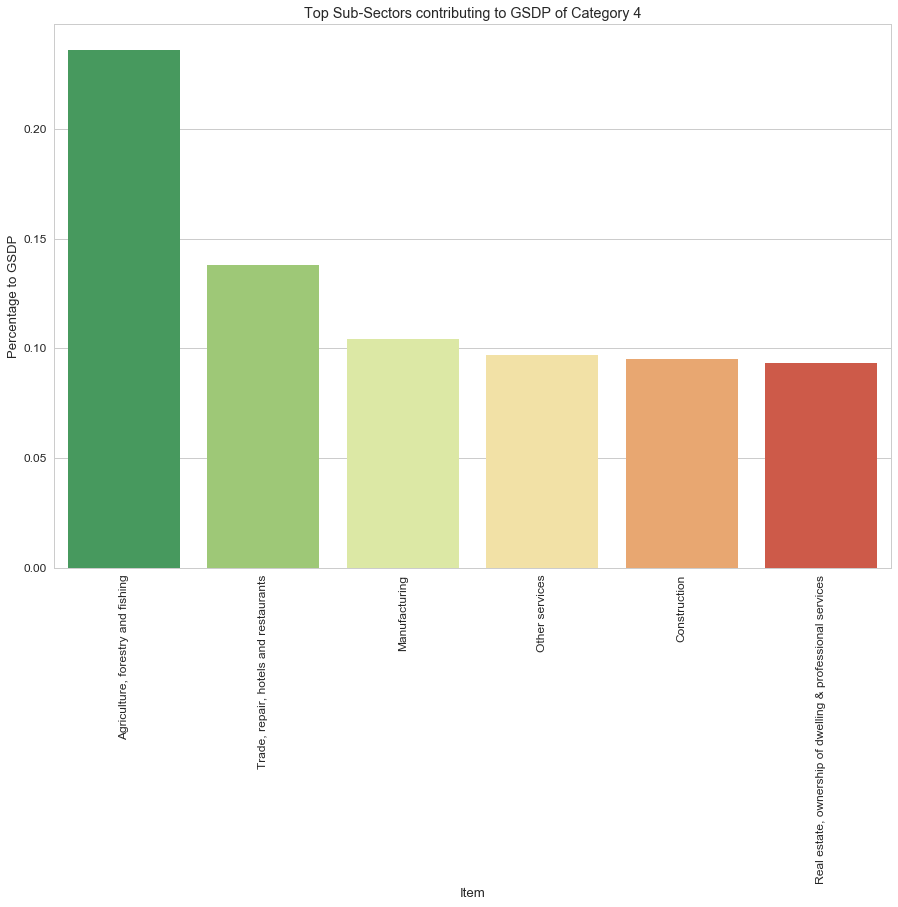

In [642]:
fig = plt.figure(figsize=(15,10))
sns.set(font_scale=1.2)
sns.set_style('whitegrid')


sns.barplot('Item','Percentage to GSDP',data = c4_new_mean,order = c4_new_mean['Item'],palette='RdYlGn_r' )

plt.xticks(rotation = 90)
plt.title("Top Sub-Sectors contributing to GSDP of Category 4")

plt.show()

- For Category 4 (quantile lower than 0.2) Top Sub-Sectors that are contributing for almost 80% of thte total GDP are:
    - Agriculture
    - Trade and Repair
    - Manufacturing
    - Other Services
    - Construction
    - Real Estate , ownershit etc

#### For category c3

In [637]:
c3['chhattisgarh_per'] = c3['chhattisgarh']/c3['chhattisgarh'].sum()
c3['meghalaya_per'] = c3['meghalaya']/c3['meghalaya'].sum()
c3['mizoram_per'] = c3['mizoram']/c3['mizoram'].sum()
c3['nagaland_per'] = c3['nagaland']/c3['nagaland'].sum()
c3['odisha_per'] = c3['odisha']/c3['odisha'].sum()
c3['rajasthan_per'] = c3['rajasthan']/c3['rajasthan'].sum()
c3['tripura_per'] = c3['tripura']/c3['tripura'].sum()

In [638]:
c3_new = c3.drop(['S.No.', 'chhattisgarh', 'meghalaya', 'mizoram', 'nagaland', 'odisha', 'rajasthan', 'tripura'],axis=1)
c3_new_mean = pd.DataFrame(c3_new.mean(axis=1,skipna=True))
c3_new_mean = pd.concat([c3['Item'],c3_new_mean],axis=1)
c3_new_mean.columns = ['Item','Percentage to GSDP']
c3_new_mean = c3_new_mean.sort_values('Percentage to GSDP' , ascending = False)
c3_new_mean['Cum_sum'] = c3_new_mean['Percentage to GSDP'].cumsum()
c3_new_mean = c3_new_mean[c3_new_mean['Cum_sum']<=0.80]

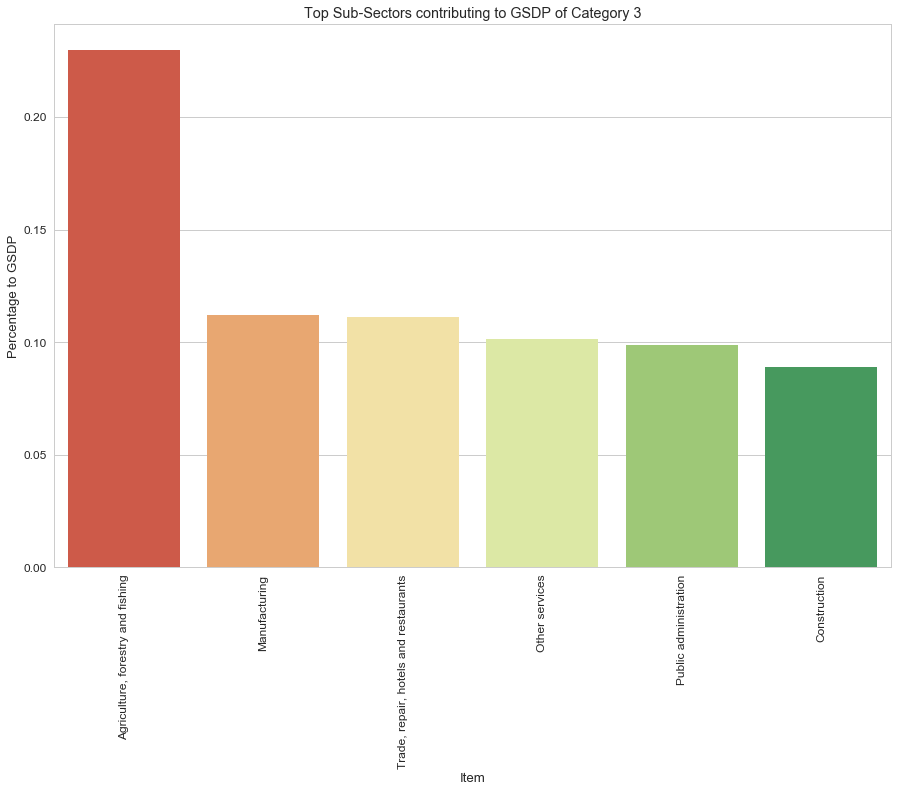

In [644]:
fig = plt.figure(figsize=(15,10))
sns.set(font_scale=1.2)
sns.set_style('whitegrid')


sns.barplot('Item','Percentage to GSDP',data = c3_new_mean,order = c3_new_mean['Item'],palette='RdYlGn' )

plt.xticks(rotation = 90)
plt.title("Top Sub-Sectors contributing to GSDP of Category 3")

plt.show()

- For Category 3 (quantile between 0.2 and o.5 ) Top Sub-Sectors that are contributing for almost 80% of thte total GDP are:
    - Agriculture
    - Manufacturing
    - Trade and Repair
    - Other Services
    - Public Administration
    - Construction

#### For Category c2

In [634]:
c2['andhra_per'] = c2['andhra']/c2['andhra'].sum()
c2['arunachal_per'] = c2['arunachal']/c2['arunachal'].sum()
c2['gujarat_per'] = c2['gujarat']/c2['gujarat'].sum()
c2['himachal_per'] = c2['himachal']/c2['himachal'].sum()
c2['karnataka_per'] = c2['karnataka']/c2['karnataka'].sum()
c2['maharashtra_per'] = c2['maharashtra']/c2['maharashtra'].sum()
c2['punjab_per'] = c2['punjab']/c2['punjab'].sum()
c2['tamilnadu_per'] = c2['tamilnadu']/c2['tamilnadu'].sum()
c2['telangana_per'] = c2['telangana']/c2['telangana'].sum()
c2['uttarakhand_per'] = c2['uttarakhand']/c2['uttarakhand'].sum()

In [635]:
c2_new = c2.drop(['S.No.','andhra', 'arunachal', 'gujarat', 'himachal', 'karnataka', 'maharashtra', 'punjab',
                  'tamilnadu', 'telangana', 'uttarakhand'],axis=1)
c2_new_mean = pd.DataFrame(c2_new.mean(axis=1,skipna=True))
c2_new_mean = pd.concat([c2['Item'],c2_new_mean],axis=1)
c2_new_mean.columns = ['Item','Percentage to GSDP']
c2_new_mean = c2_new_mean.sort_values('Percentage to GSDP' , ascending = False)
c2_new_mean['Cum_sum'] = c2_new_mean['Percentage to GSDP'].cumsum()
c2_new_mean = c2_new_mean[c2_new_mean['Cum_sum']<=0.80]

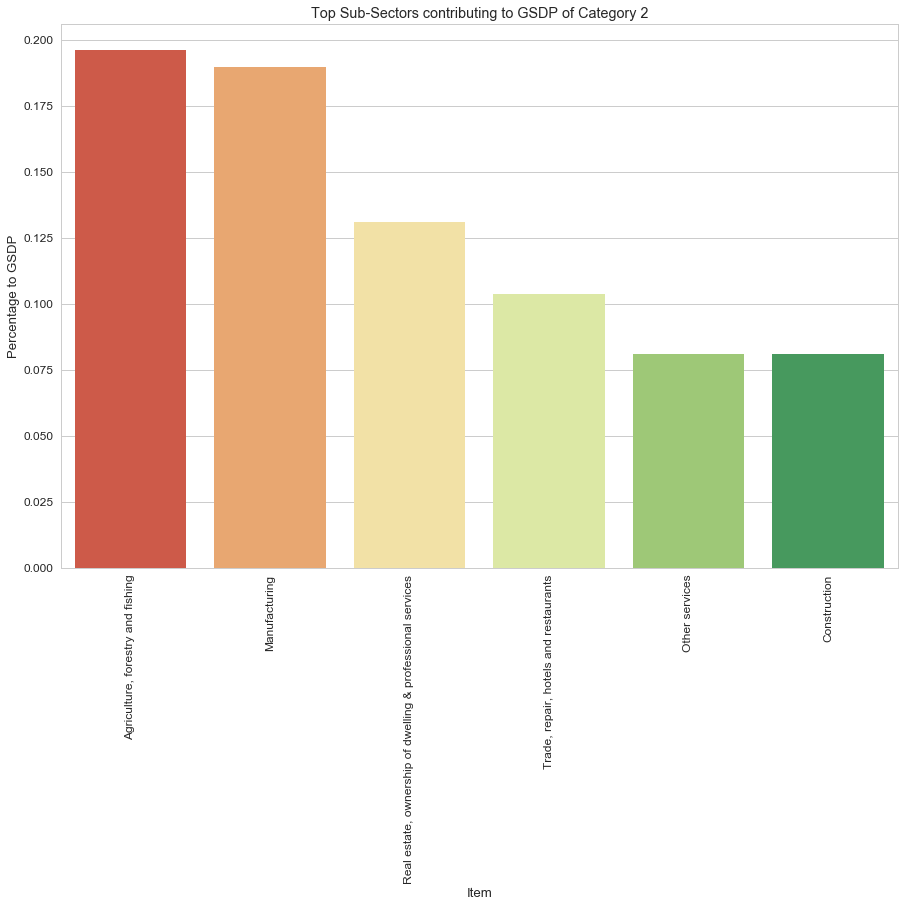

In [636]:
fig = plt.figure(figsize=(15,10))
sns.set(font_scale=1.2)
sns.set_style('whitegrid')


sns.barplot('Item','Percentage to GSDP',data = c2_new_mean,order = c2_new_mean['Item'],palette='RdYlGn' )

plt.xticks(rotation = 90)
plt.title("Top Sub-Sectors contributing to GSDP of Category 2")

plt.show()

- For Category 2 (quantile between 0.5 and o.85 ) Top Sub-Sectors that are contributing for almost 80% of thte total GDP are:
    - Agriculture
    - Manufacturing
    - Rea Estate and ownership
    - Trade and Repair
    - Other Services
    - contruction

#### For Category c1

In [631]:
c1['goa_per'] = c1['goa']/c1['goa'].sum()
c1['haryana_per'] = c1['haryana']/c1['haryana'].sum()
c1['kerala_per'] = c1['kerala']/c1['kerala'].sum()
c1['sikkim_per'] = c1['sikkim']/c1['sikkim'].sum()

In [632]:
c1_new = c1.drop(['S.No.', 'goa', 'haryana', 'kerala', 'sikkim'],axis=1)
c1_new_mean = pd.DataFrame(c1_new.mean(axis=1,skipna=True))
c1_new_mean = pd.concat([c1['Item'],c1_new_mean],axis=1)
c1_new_mean.columns = ['Item','Percentage to GSDP']
c1_new_mean = c1_new_mean.sort_values('Percentage to GSDP' , ascending = False)
c1_new_mean['Cum_sum'] = c1_new_mean['Percentage to GSDP'].cumsum()
c1_new_mean = c1_new_mean[c1_new_mean['Cum_sum']<=0.80]

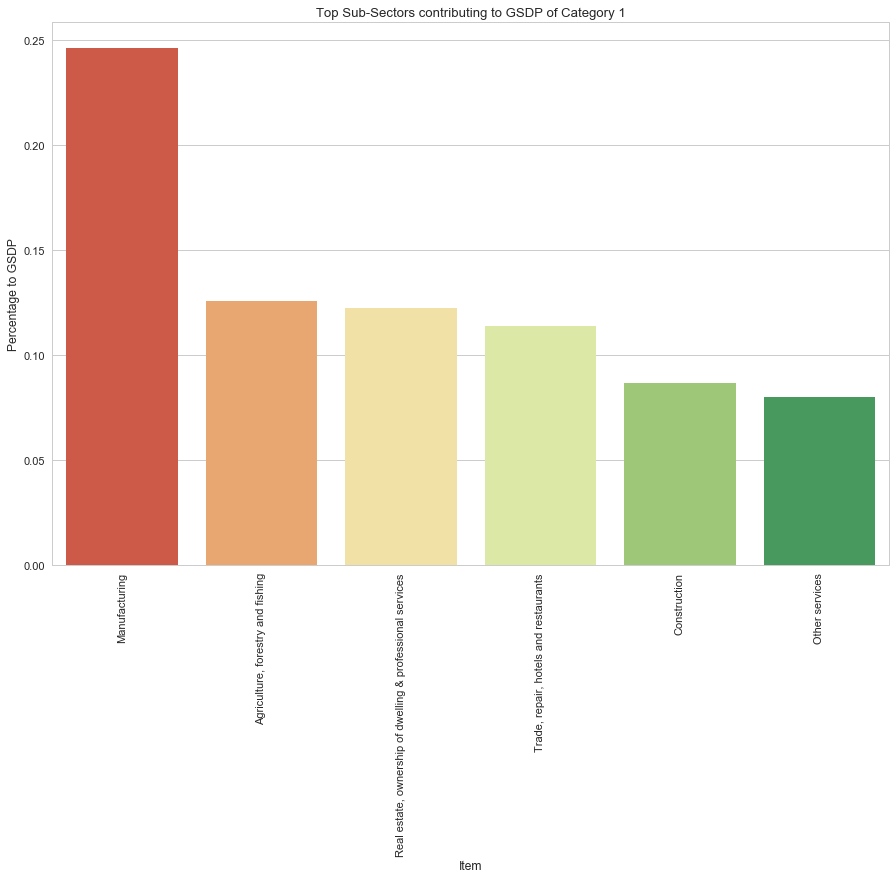

In [633]:
fig = plt.figure(figsize=(15,10))
sns.set(font_scale=1.1)
sns.set_style('whitegrid')


sns.barplot('Item','Percentage to GSDP',data = c1_new_mean,order = c1_new_mean['Item'],palette='RdYlGn' )

plt.xticks(rotation = 90)
plt.title("Top Sub-Sectors contributing to GSDP of Category 1")

plt.show()

- For Category 1 (quantile between 0.85 and 1 ) Top Sub-Sectors that are contributing for almost 80% of thte total GDP are:
    - Manufacturing
    - Agriculture
    - Real Estate and ownership
    - Trade ,Repair etc
    - Construction
    - Other Services

#### Two Recommendations to Increase the GDP per capita :

- In Category 1, the main focus is in Manufacturing , if the focus is slightly shifted to sector than Manufacturing like , Agriculture and Real Estate, the per capita GDP would definitely increase
- Also if the focus that is carried in Category 2, if the same strategy is carried out in Category 3 , then also the per capita GDP would rise

### For Part - II

In [645]:
data2 = pd.read_csv("D:/NoBroker/Backup/Data-II-Download.csv")

In [648]:
# Gathering Data only for 2014-2015

data3 = data2[['Level of Education - State', 'Primary - 2014-2015', 'Primary - 2014-2015.1', 
                 'Upper Primary - 2014-2015', 'Secondary - 2014-2015',
                'Senior Secondary - 2014-2015']]

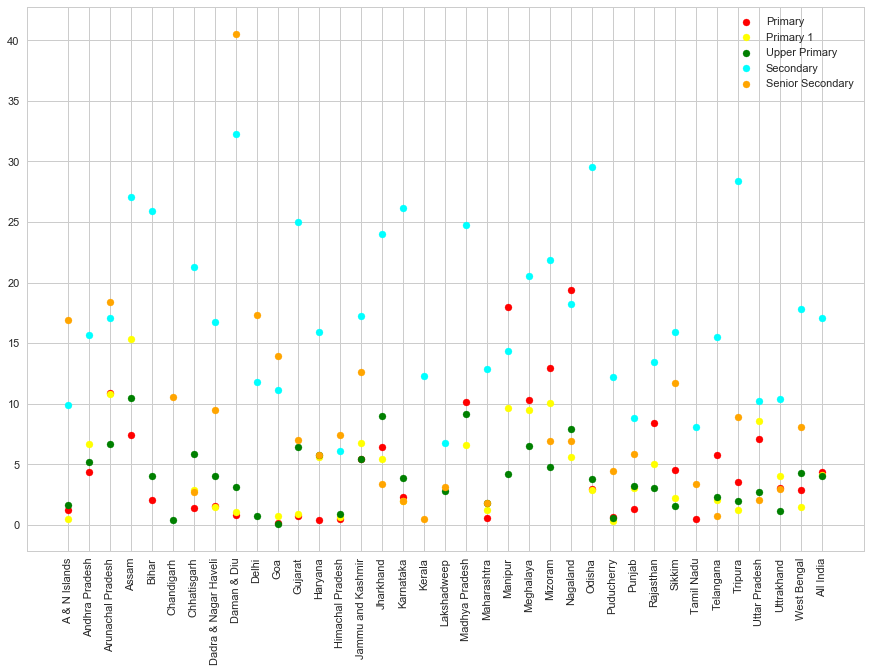

In [672]:
# Plotting Drop out Rates for the year 2014-2015

fig = plt.figure(figsize=(15,10))
sns.set(font_scale=1.1)
sns.set_style('whitegrid')


plt.scatter(data3['Level of Education - State'],data3['Primary - 2014-2015'],label='Primary',color = 'red')
plt.scatter(data3['Level of Education - State'],data3['Primary - 2014-2015.1'],label='Primary 1',color='yellow')
plt.scatter(data3['Level of Education - State'],data3['Upper Primary - 2014-2015'],label='Upper Primary',color='green')
plt.scatter(data3['Level of Education - State'],data3['Secondary - 2014-2015'],label='Secondary',color = 'cyan')
plt.scatter(data3['Level of Education - State'],data3['Senior Secondary - 2014-2015'],label='Senior Secondary',color='orange')


plt.xticks(rotation = 90)
plt.legend()
plt.show()

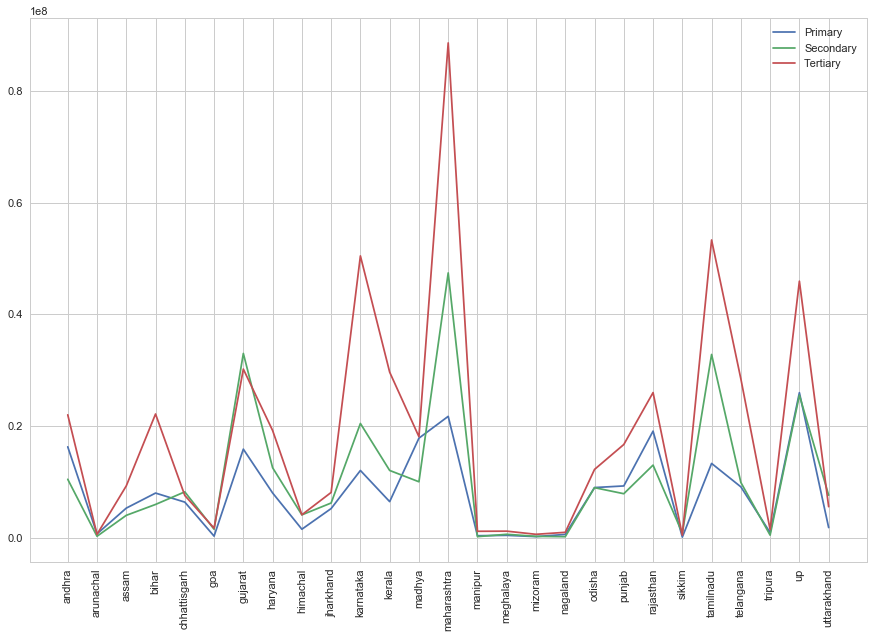

In [663]:
# Plotting the GDP for the year 2014-2015

fig = plt.figure(figsize=(15,10))
sns.set(font_scale=1.1)
sns.set_style('whitegrid')


plt.plot(all_states_total_gdp_t['States'],all_states_total_gdp_t['Primary'],label = 'Primary')
plt.plot(all_states_total_gdp_t['States'],all_states_total_gdp_t['Secondary'],label ='Secondary')
plt.plot(all_states_total_gdp_t['States'],all_states_total_gdp_t['Tertiary'],label ='Tertiary')


plt.xticks(rotation = 90)
plt.legend()
plt.show()

- So if referred both the plots, we can say, as our drop out rates increases, our GDP decreases.
- We can GDP is highly co-related with the drop out rates, so if there is any increase in the Drop out rates of the education, there will be a tremendus decrease in the GDp for that year
- Hypothesis that can be made could be :
    - H0 - GDP is not affected by drop out rates
    - H1 - GDp is affected by drop-out rates

### Thank You